# Energieträger Diagram 

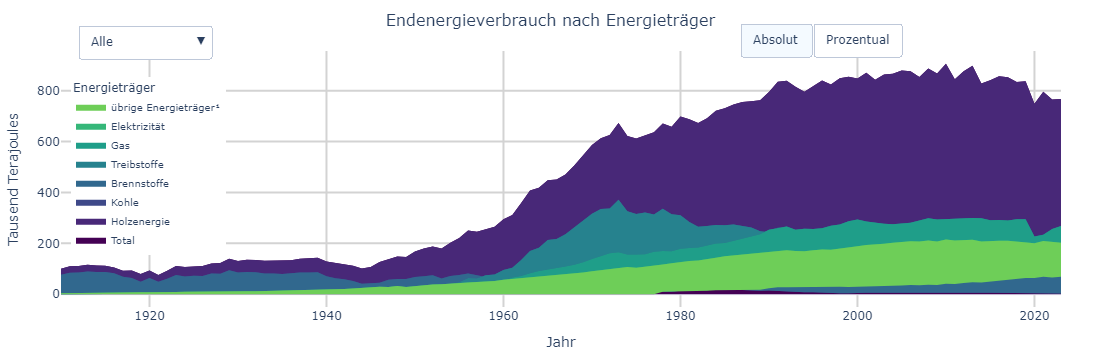

In [29]:
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px 


df = pd.read_csv('../Daten/cleaned_energy_data_fixed.xls', encoding='ISO-8859-1')


df.columns = df.columns.str.encode('latin1').str.decode('utf-8')


df.set_index("Year", inplace=True)


row_sums = df.sum(axis=1) 
df_percentage = df.div(row_sums, axis=0) * 100 


df_percentage = df_percentage * 2


df_percentage = df_percentage.clip(upper=100)


pivot_df = df.reset_index()


fig = go.Figure()

colors = px.colors.sequential.Viridis[:len(df.columns)]  


def add_traces(data, hover_suffix=""):
    fig.data = []
    for i, col in enumerate(data.columns):
        fig.add_trace(go.Scatter(
            x=data.index,
            y=data[col],
            fill='tonexty',  
            fillcolor=colors[i],
            name=col,
            hovertemplate=f'{col}: %{{y:.2f}}{hover_suffix}<extra></extra>', 
            line=dict(width=0)  
        ))


add_traces(df)


fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            x=0.15, 
            y=1.1,  
            showactive=True,
            buttons=[
                dict(
                    label="Alle",
                    method="relayout",
                    args=[{"xaxis.range": [df.index.min(), df.index.max()]}]
                ),
                dict(
                    label="Letztes 1 Jahr",
                    method="relayout",
                    args=[{"xaxis.range": [df.index.max() - 1, df.index.max()]}]
                ),
                dict(
                    label="Letzte 5 Jahre",
                    method="relayout",
                    args=[{"xaxis.range": [df.index.max() - 5, df.index.max()]}]
                ),
                dict(
                    label="Letzte 10 Jahre",
                    method="relayout",
                    args=[{"xaxis.range": [df.index.max() - 10, df.index.max()]}]
                ),
                dict(
                    label="Letzte 20 Jahre",
                    method="relayout",
                    args=[{"xaxis.range": [df.index.max() - 20, df.index.max()]}]
                ),
                dict(
                    label="Letzte 40 Jahre",
                    method="relayout",
                    args=[{"xaxis.range": [df.index.max() - 40, df.index.max()]}]
                )
            ]
        ),
        dict(
            type="buttons",
            direction="left",
            x=0.85,  
            y=1.15,  
            buttons=[
                dict(
                    label="Absolut",
                    method="update",
                    args=[
                        {"y": [df[col] for col in df.columns]},
                        {"yaxis": {"fixedrange": True}, "hovertemplate": "%{y:.2f}"}
                    ]
                ),
                dict(
                    label="Prozentual",
                    method="update",
                    args=[
                        {"y": [df_percentage[col] for col in df_percentage.columns]},
                        {"yaxis": {"title": "Prozent", "range": [0, 100], "fixedrange": True}, "hovertemplate": "%{y:.2f}%"}
                    ]
                )
            ],
            pad={"r": 10, "t": 10},
            showactive=True
        )
    ]
)


fig.update_layout(
    title="Endenergieverbrauch nach Energieträger", 
    title_x=0.5, 
    title_font=dict(size=16),
    xaxis=dict(
        title="Jahr", 
        showgrid=True, 
        gridwidth=2, 
        gridcolor='lightgray', 
        fixedrange=True
    ),
    yaxis=dict(
        title="Tausend Terajoules", 
        showgrid=True, 
        gridwidth=2, 
        gridcolor='lightgray', 
        fixedrange=True 
    ),
    plot_bgcolor='white', 
    margin=dict(l=40, r=40, t=40, b=40),
    legend=dict(
        title="Energieträger", 
        x=0.01, 
        y=0.9,  
        font=dict(size=10), 
        title_font=dict(size=12)
    ),
    hovermode="x unified",
    template='plotly_white',  
)


fig.show()


# Energieverbrauch nach Energiequelle

## Hypothese:
Von den Energieträgern (Holz, Kohle, Brennstoff, Treibstoff, Gas, Elektrizität & andere) gehe ich davon aus, dass 1910 der Kohleverbrauch höher ist. Ich denke, dass zu dieser Zeit die Häuser oder auch Industrieöfen und Lokomotiven noch mit Kohle oder Holz geheizt wurden. Elektrizität wird auch vorhanden sein, aber eher flach im Gegensatz dazu. Treibstoffe wie Benzin sollten schon verwendet worden sein, aber irgendwo zwischen Elektrizität und Holz.
Generell würde ich für diese Zeit sagen, dass der Endenergieverbrauch extrem niedrig war, in den hohen Zehntausenden von Terajoule.
Für die Zeit bis 1950 und etwas darüber hinaus werden die Brennstoffzahlen durch den Zweiten Weltkrieg, in dem viel Brennstoff verbraucht wurde, aber auch durch die Erfindung von Maschinen, die Brennstoff benötigten, einen großen Aufschwung erfahren. Der Treibstoff verdrängt die Kohle und das Holz und lässt deren Zahlen in den Boden sinken.
Der Energieverbrauch steigt langsam an und ist jetzt schon mehr als dreimal so hoch wie in den 40 Jahren davor.
Elektrizität wird ab dem Jahr 2000 einen enormen Anstieg erfahren, der wahrscheinlich schon früher mit dem Aufkommen von Computern und drahtlosen Mobiltelefonen wie Nokia beginnt. Treibstoffe werden ebenfalls hohe Zahlen erreichen, da es heute 0,5 Autos pro Einwohner gibt, oder ein Auto auf zwei Personen.
Ein weiterer Aspekt der Energiequellen, dem wir noch keine Aufmerksamkeit geschenkt haben, sind die anderen Energiequellen. Diese waren früher wahrscheinlich verschwindend gering. Wahrscheinlich handelt es sich dabei um erneuerbare Energien, die mit dem Trend zu einer ökologischeren Erde zunehmen.
Alles in allem ist der Energieverbrauch im Vergleich zu 1910 enorm gestiegen und wird auch in Zukunft weiter steigen.


## Analyse der Hypothese:
1910 war Kohle die wichtigste Energiequelle. Der Verbrauch lag bei 76,31 Tausend Terajoule, während andere wie Holz (17,19 Tausend Terajoule), Elektrizität (3,53 Tausend Terajoule) und Treibstoffe wie Benzin (0,5 Tausend Terajoule) viel weniger genutzt wurden. Das passt zur Annahme, dass Kohle damals für Heizen, Industrie und Züge unverzichtbar war. Der gesamte Energieverbrauch war mit 99,99 Tausend Terajoule recht niedrig, was darauf hindeutet, dass der Bedarf insgesamt geringer war.
1950 stieg der Energieverbrauch deutlich auf 167,7 Tausend Terajoule. Das lag vor allem an der zunehmenden Industrialisierung und dem Einsatz von Maschinen, besonders rund um den Zweiten Weltkrieg. Kohle war mit 67,69 Tausend Terajoule immer noch wichtig, wurde aber stärker von Elektrizität (31,78 Tausend Terajoule) und Treibstoffen (19,07 Tausend Terajoule) ergänzt. Holz blieb mit 21,72 Tausend Terajoule etwa gleich. Man sieht, dass Treibstoffe an Bedeutung gewannen, während Kohle und Holz langsam weniger wichtig wurden.
Im Jahr 2000 sah alles ganz anders aus. Elektrizität (188,54 Tausend Terajoule) und Treibstoffe (293,37 Tausend Terajoule) waren die Hauptenergiequellen. Kohle spielte kaum noch eine Rolle (5,77 Tausend Terajoule), und Holz stieg leicht auf 28,13 Tausend Terajoule, was auf einen Anfangstrend zu erneuerbaren Energien hinweisen könnte. Der gesamte Energieverbrauch war mit 847,79 Tausend Terajoule extrem hoch, was den steigenden Bedarf einer modernen Welt zeigt. Das bestätigt, dass Elektrizität und Treibstoffe ab dem 20. Jahrhundert führend wurden und Kohle sowie Holz zurücktraten.
Insgesamt stimmt die Hypothese. Kohle war 1910 führend, der Energieverbrauch stieg durch den Zweiten Weltkrieg stark an, und nach 1950 übernahmen Elektrizität und Treibstoffe. Der Verbrauch ist seitdem massiv gewachsen, und erneuerbare Energien könnten in Zukunft eine größere Rolle spielen.



